# Practica sobre ElasticSearch para SPS

## 1. Creación de un índice


#### - Primer acercamiento a la tecnología.

Para la realización de este punto, se comenzó leyendo la documentación y algunos videos propios acerca de ElasticSearch. 
Personalmente, la documentación o al menos el primer acercamiento para la realización de esta practica no fue del todo "comoda" en el sentido del aprendizaje; no es muy amigable el entorno. Sin más que decir comenzamos a realizar el primer paso...

#### Crear un índice con el nombre de "log_consultas" a partir del siguiente JSON:

```JSON
{
  "@timestamp":"2010-05-15T22:00:54",
  "estado_consulta":"consumo",
  "servicio":"consulta",
  "administrador":"Juan Carlos",
  "consultas_realizadas":52
}
```

#### Donde la respuesta a nuestra consulta a partir de un POST fue la siguiente:
```JSON
{
  "_index" : "log_consultas",
  "_type" : "_doc",
  "_id" : "jAHQRH0B3UtxvyvPLrpA",
  "_version" : 1,
  "result" : "created",
  "_shards" : {
    "total" : 2,
    "successful" : 2,
    "failed" : 0
  },
  "_seq_no" : 2,
  "_primary_term" : 1
}
```

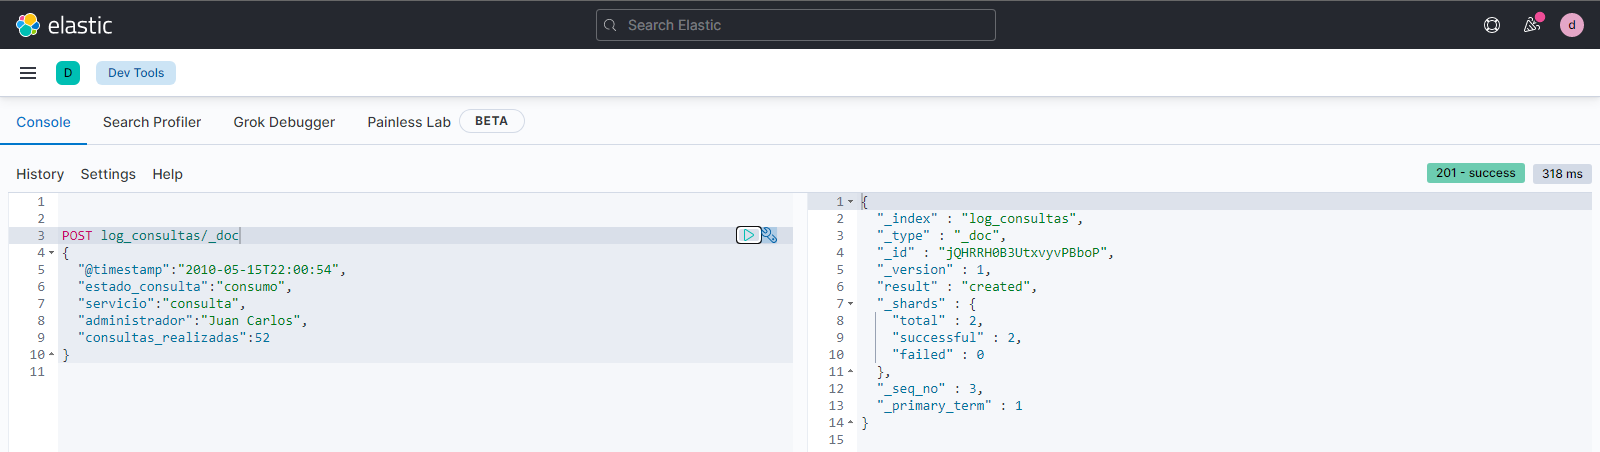


#### Vamos ahora a obtener el mapping del índice anterior para posteriormente crear un template 

Esto se realizará a partir de una petición GET usando _mapping

```JSON
GET log_consultas/_mapping
```

Y como respuesta se obtuvo lo siguiente
```JSON
{
  "log_consultas" : {
    "mappings" : {
      "properties" : {
        "@timestamp" : {
          "type" : "date"
        },
        "administrador" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        },
        "consultas_realizadas" : {
          "type" : "long"
        },
        "estado_consulta" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        },
        "servicio" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        }
      }
    }
  }
}
```

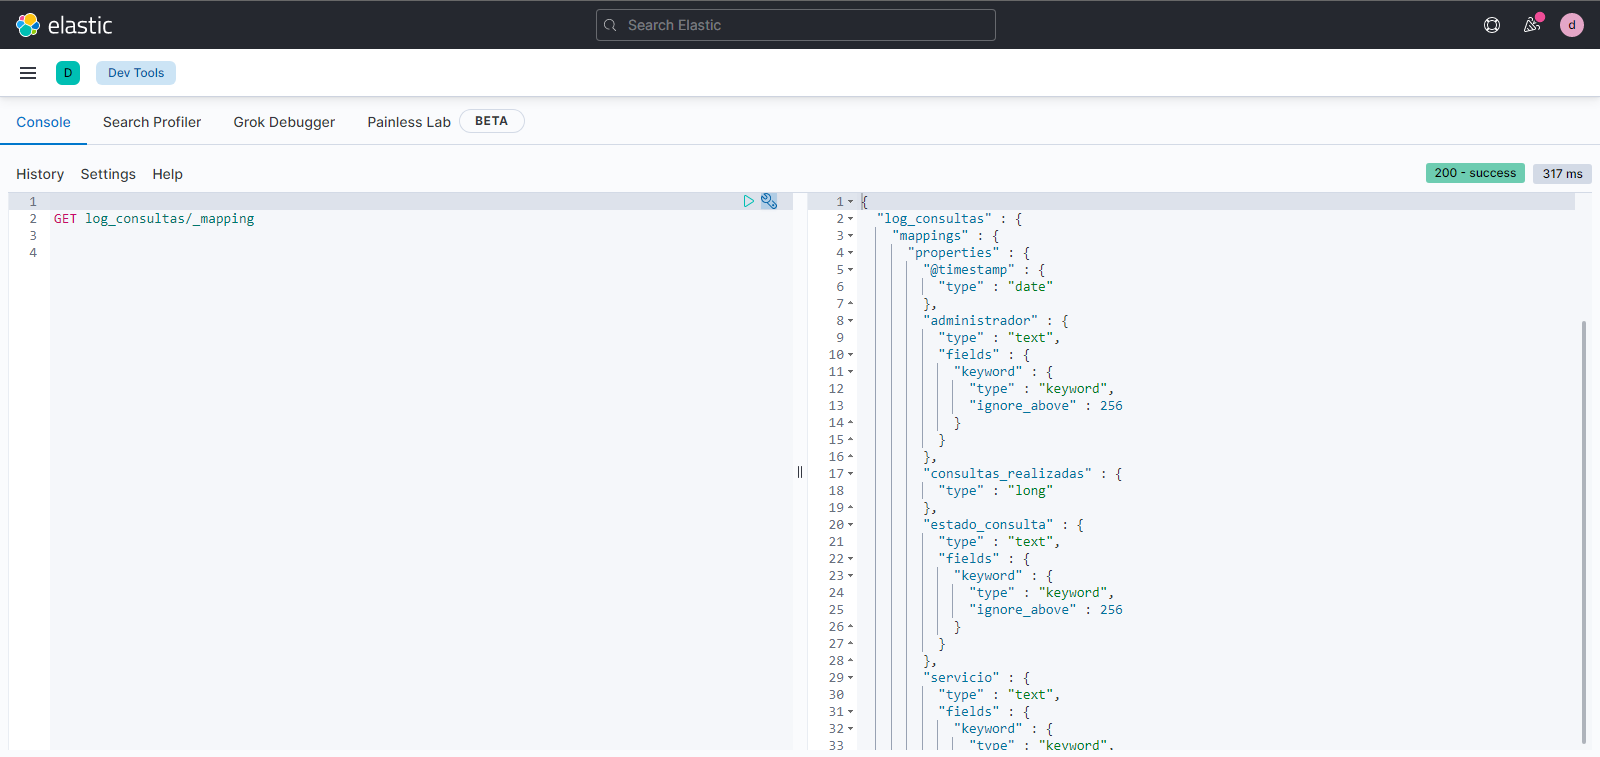

##### En este punto, tuve problemas de encontrar alguna guia que me ayudase a comprender un poco mas sobre los mappings. En YouTube encontré varios videos ilustrativos pero aun así me costo un poco entenderlo asi mismo sucedio para poder hacer el TEMPLATE. 
##### El resultado fue a partir de un POST sobre _index_template/log_consultas_templated
##### Teniendo asi lo siguiente:

```JSON
POST _index_template/log_consultas_template
{
  "index_patterns": ["log_consultas*"], 
  "template":{
    "mappings" : {
      "properties" : {
        "@timestamp" : {
          "type" : "date"
        },
        "administrador" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        },
        "consultas_realizadas" : {
          "type" : "long"
        },
        "estado_consulta" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        },
        "servicio" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        }
      }
    }
  }
}
```

Como resultado de la petición nos regresa un booleano
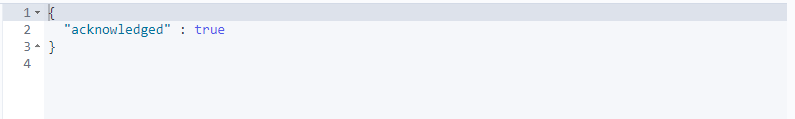

#### Finalmente su utilizó la API bulk para consultar los Registros.json, en donde la respuesta en la imagen que solo muestro algunos regiostros que nos da es la siguiente:

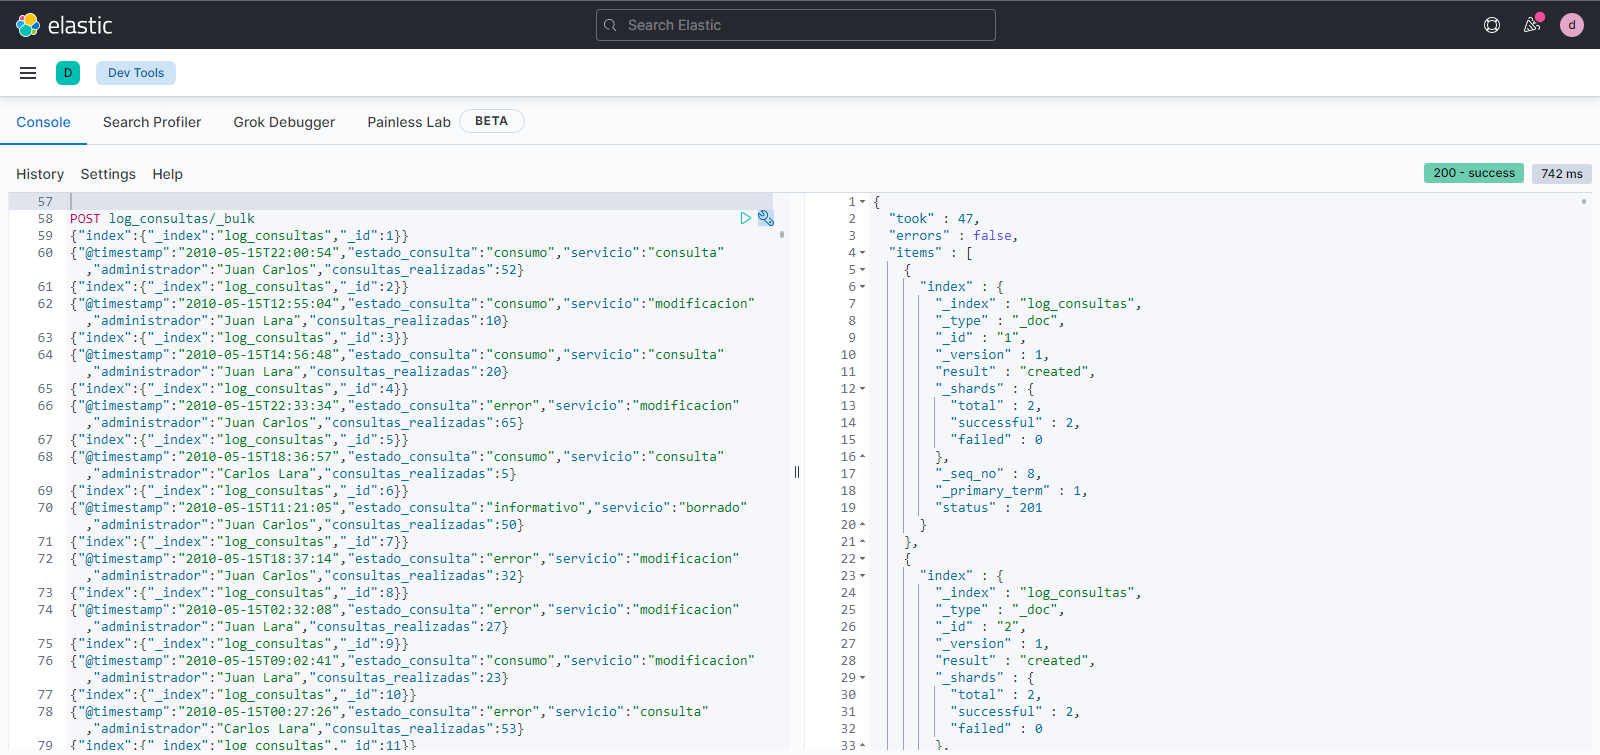



## 2. Realizar busquedas sobre el índice

#### Para poder hacer una consulta y que nos arroje que el estado_consulta sea igual a error y consumo, se utilizó una regex para encontrarlos


```JSON
GET log_consultas/_count
{
  "query": {
    "regexp": {
      "estado_consulta": "(consumo)?(error)?"
    }
  }
}
```

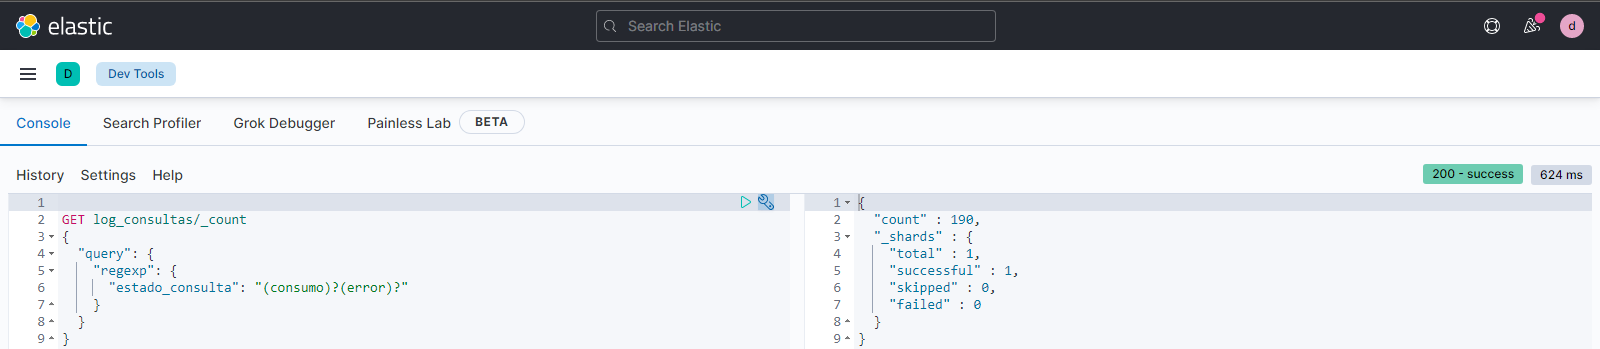


#### Luego, haremos uso de la función match para que nos regrese el numero de registros realizados por el administrador "Juan Lara"

```JSON
GET log_consultas/_count
{
  "query": {
    "match": {
      "administrador": "Juan Lara"
    }
  }
}
```
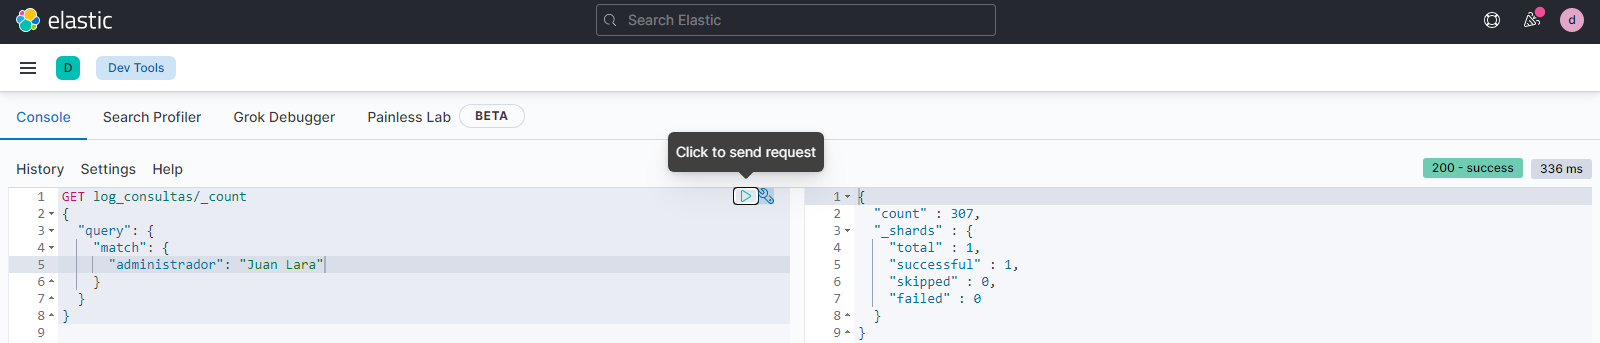

#### Para nuestra tercera consulta, haremos uso del siguiente GET 
```JSON
GET log_consultas/_search
{
  "query": { 
    "bool": { 
      "must": [
        { "match": { "estado_consulta":   "informativo" }},
        { "match": { "servicio": "borrado" }}
      ]
    }
  }
}
```

#### Finalmente se hizo la consulta para la suma de los valores en cosultas_realizadas con estado_consulta igual a error de la siguiente manera:
```JSON
GET log_consultas/_search
{
  "query": {
    "constant_score": {
      "filter": {
        "match": { "estado_consulta": "error" }
      }
    }
  },
  "aggs": {
    "suma_consultas_realizadas": { "sum": { "field": "consultas_realizadas" } }
  }
}
```

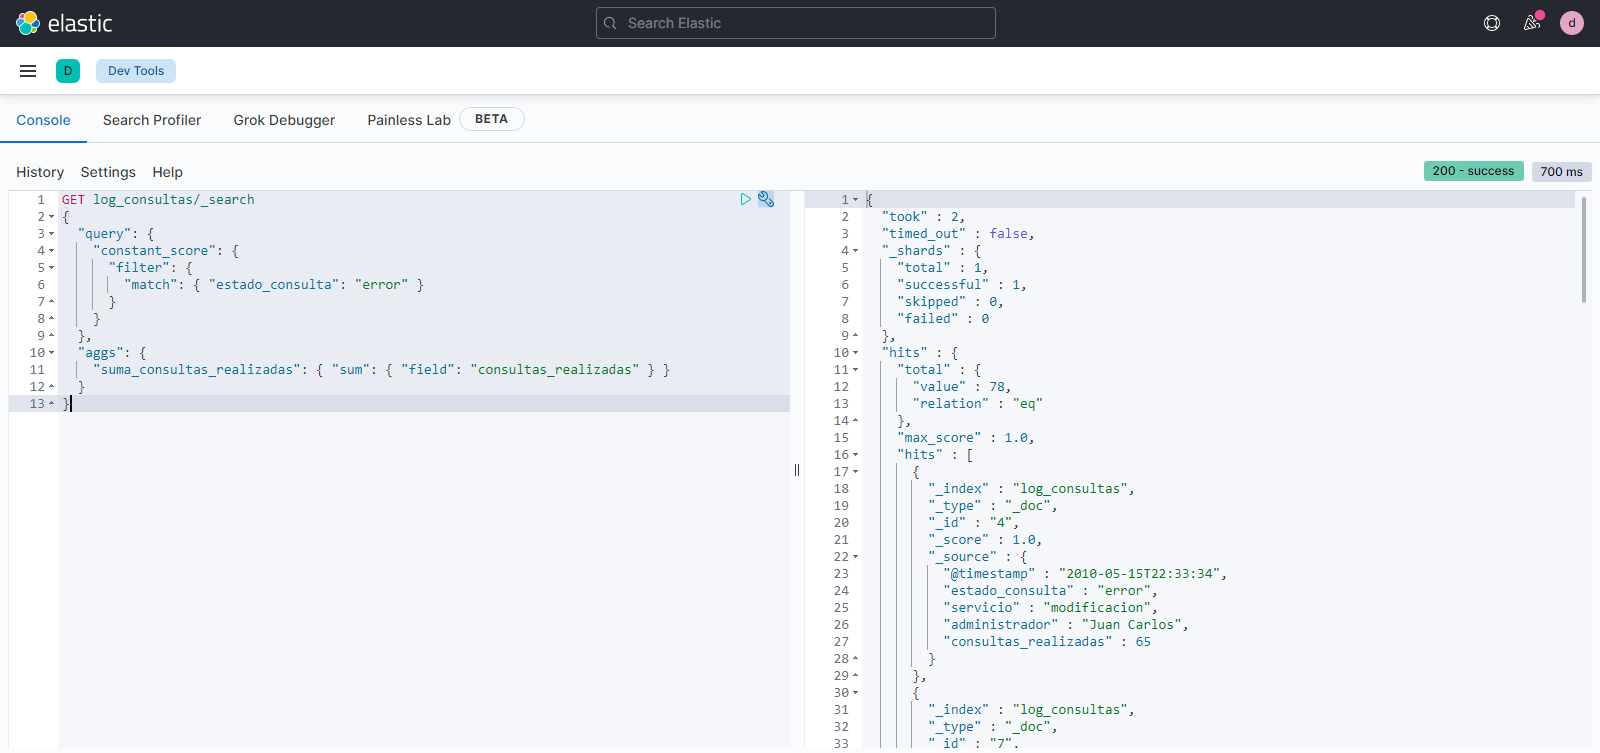

## Visualizaciones:
### Heatmap: Numero de servicios realizados por administrador
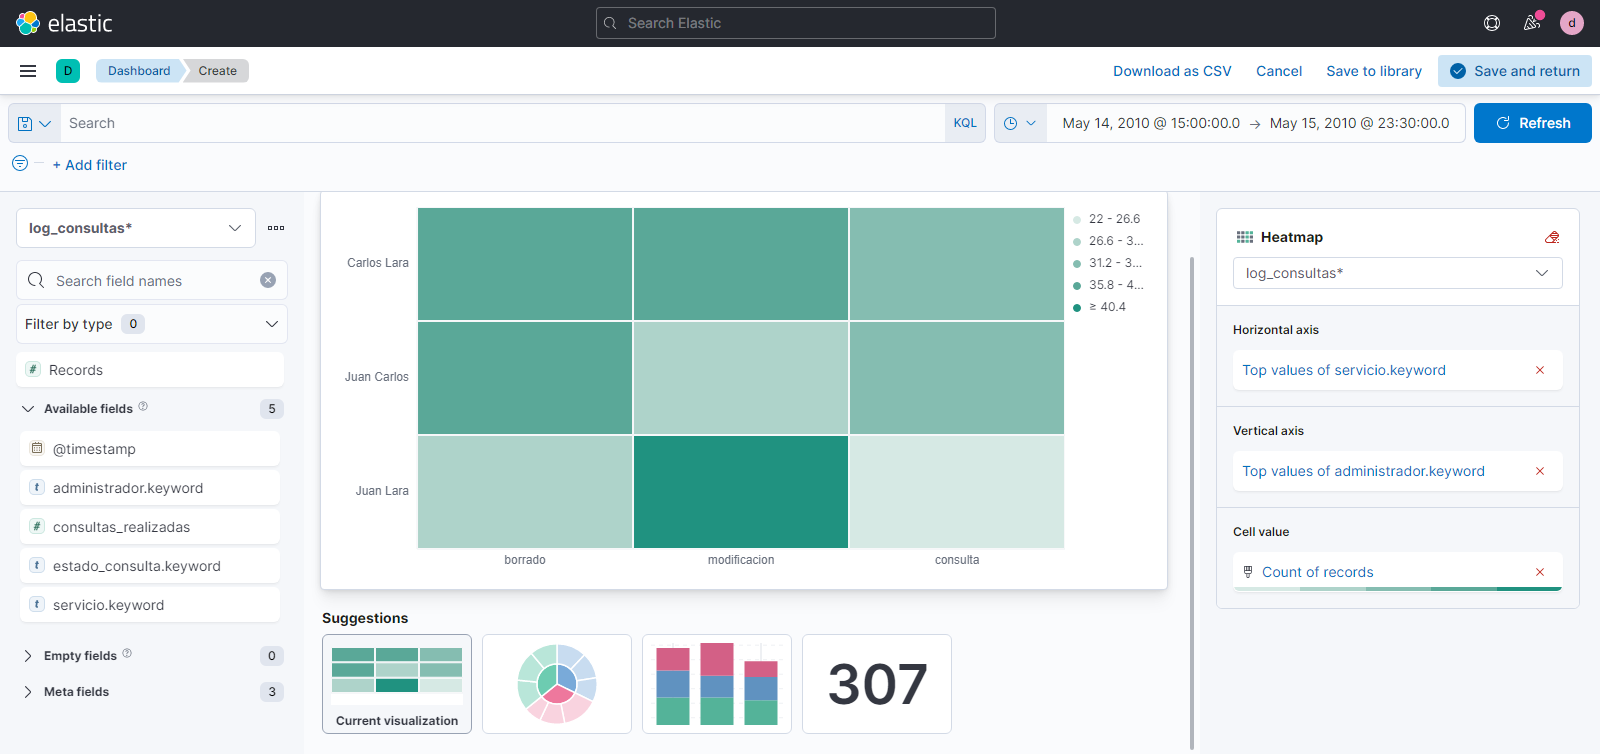

### Barras: Numero de registros con estado_consulta = error en el tiempo
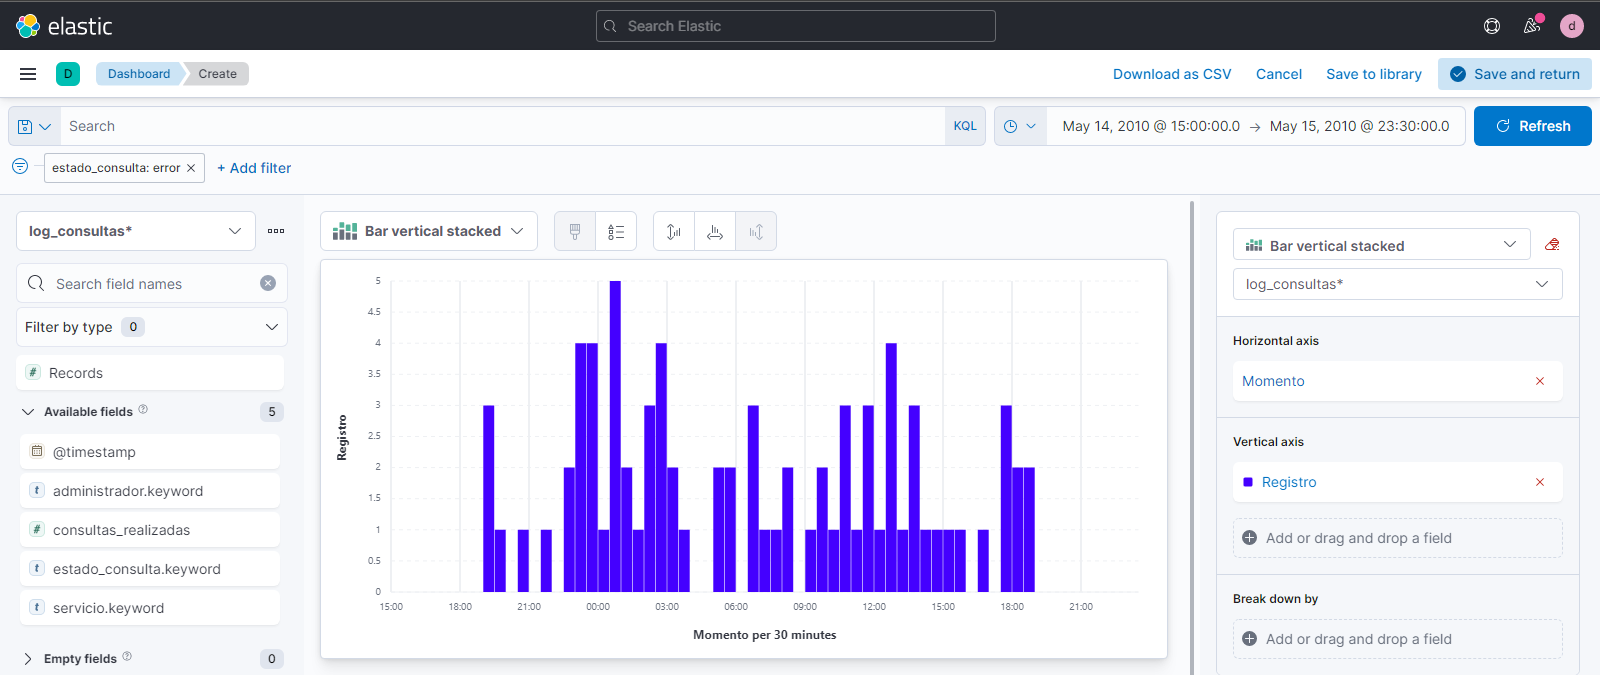